<a href="https://colab.research.google.com/github/jennyweng90/deep-learning/blob/main/Titanic_ANN_Demo_for_class_2023_student_ver(Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load data(sometimes need to use "/")
#df = pd.read_csv('D:/pythonData/python_demo_data/Titanic_demo_1.csv')
# Colab
df = pd.read_csv('/content/drive/MyDrive/assignment_data/Titanic_assignment_data_27.csv')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,20.0,1,0,7.9250,S,yes
1,2,male,40.0,1,0,26.0000,S,no
2,3,male,27.0,0,0,7.8958,S,no
3,2,male,8.0,0,2,32.5000,S,no
4,1,female,35.0,1,0,52.0000,S,yes
...,...,...,...,...,...,...,...,...
1042,1,male,24.0,1,0,60.0000,S,no
1043,3,male,44.0,0,1,16.1000,S,no
1044,3,male,32.0,0,0,22.5250,S,no
1045,3,male,20.0,0,0,7.8542,S,no


# 1. Quick overview to get a grasp of the data set

key function: pd.info(); pd.astype(); describe(); pd.value_counts()

In [4]:
# 1.1 Easiest way to check data type and if there are any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   int64  
 1   Sex       1047 non-null   object 
 2   Age       807 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1047 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 65.6+ KB


In [5]:
# 1.2 When using the describe function in default, pandas automatically selects the numerical columns
df.describe() #做整理再交

,Pclass,Age,SibSp,Parch,Fare
count,1047.000000,807.000000,1047.000000,1047.000000,1047.000000
mean,2.286533,30.210657,0.484241,0.386819,33.466292
std,0.838851,14.143021,0.966697,0.886665,52.713425
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


Note: Pclass is categorical data with dummies, so converting to correct data type is required

In [6]:
# Change data type #Pclass 歸類為object
df[['Pclass']]=df[['Pclass']].astype(str)
df.info()
#Variable (feature) definition
#Pclass- Ticket class
#Swx- Biological male or female
#Age- Age
#SibSp- Number of Siblings/Spouses Aboard
#Parch- Number of Parents/Children Aboard
#Fare- Passenger Fare
#Embarked-Por of Embarkation
#Survived- Whether dead or alive

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   object 
 1   Sex       1047 non-null   object 
 2   Age       807 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1047 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 65.6+ KB


In [7]:
# 1.2 Show the correct descriptive statistics
df.describe() 

,Age,SibSp,Parch,Fare
count,807.000000,1047.000000,1047.000000,1047.000000
mean,30.210657,0.484241,0.386819,33.466292
std,14.143021,0.966697,0.886665,52.713425
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


In [8]:
# 1.3 Add include='all' to select all columns
df.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,1047,1047,807.000000,1047.000000,1047.000000,1047.000000,1047,1047
unique,3,2,NaN,NaN,NaN,NaN,3,2
top,3,male,NaN,NaN,NaN,NaN,S,no
freq,561,677,NaN,NaN,NaN,NaN,739,644
mean,NaN,NaN,30.210657,0.484241,0.386819,33.466292,NaN,NaN
std,NaN,NaN,14.143021,0.966697,0.886665,52.713425,NaN,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,21.000000,0.000000,0.000000,7.925000,NaN,NaN
50%,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,NaN,NaN,39.000000,1.000000,0.000000,31.275000,NaN,NaN


In [7]:
# 1.4 Using value_counts function to count frequency in categorical column
print(df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Survived']].value_counts(sort=True))

Pclass
3         561
1         261
2         225
dtype: int64
+-----------------------+
Sex   
male      677
female    370
dtype: int64
+-----------------------+
Embarked
S           739
C           216
Q            92
dtype: int64
+-----------------------+
Survived
no          644
yes         403
dtype: int64


In [8]:
# Tips: row,column 控制column row
#df[['Age','SibSp','Parch','Fare']].describe()
#df.loc[:,['Age','SibSp','Parch','Fare']].describe()


# 2. Data preprocessing

key function: pd.dropma() unique(); LabelEncoder(); pd.get_dummies

In [9]:
# 把有遺失值的刪掉 剩1001列
new_df=df.dropna(axis=0, how='any')
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,20.0,1,0,7.9250,S,yes
1,2,male,40.0,1,0,26.0000,S,no
2,3,male,27.0,0,0,7.8958,S,no
3,2,male,8.0,0,2,32.5000,S,no
4,1,female,35.0,1,0,52.0000,S,yes
...,...,...,...,...,...,...,...,...
1042,1,male,24.0,1,0,60.0000,S,no
1043,3,male,44.0,0,1,16.1000,S,no
1044,3,male,32.0,0,0,22.5250,S,no
1045,3,male,20.0,0,0,7.8542,S,no


In [10]:
# Recheck the descriptive statistics
new_df[['Age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,807.000000,807.000000,807.000000,807.000000
mean,30.210657,0.496902,0.412639,37.297295
std,14.143021,0.862611,0.847995,57.148565
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,15.850000
75%,39.000000,1.000000,1.000000,37.004200
max,80.000000,5.000000,6.000000,512.329200


In [11]:
# Recheck the descriptive statistics
print(new_df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Survived']].value_counts(sort=True))

Pclass
3         377
1         224
2         206
dtype: int64
+-----------------------+
Sex   
male      497
female    310
dtype: int64
+-----------------------+
Embarked
S           614
C           158
Q            35
dtype: int64
+-----------------------+
Survived
no          473
yes         334
dtype: int64


In [12]:
# 2.2 Using unique function to check category label
print('Pclass',new_df['Pclass'].unique())
print('Sex',new_df['Sex'].unique())
print('Embarked',new_df['Embarked'].unique())
print('Survived',new_df['Survived'].unique())

Pclass ['3' '2' '1']
Sex ['male' 'female']
Embarked ['S' 'C' 'Q']
Survived ['yes' 'no']


In [13]:
#對於資料型態是Object的 Using pd.get_dummies function to generate dummies
#原始數據集中的分類變量已轉換為二元數值特徵，以用於機器學習模型
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived'])
dummied_new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,20.0,1,0,7.9250,0,0,1,0,1,0,0,1,0,1
1,40.0,1,0,26.0000,0,1,0,0,1,0,0,1,1,0
2,27.0,0,0,7.8958,0,0,1,0,1,0,0,1,1,0
3,8.0,0,2,32.5000,0,1,0,0,1,0,0,1,1,0
4,35.0,1,0,52.0000,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,24.0,1,0,60.0000,1,0,0,0,1,0,0,1,1,0
1043,44.0,0,1,16.1000,0,0,1,0,1,0,0,1,1,0
1044,32.0,0,0,22.5250,0,0,1,0,1,0,0,1,1,0
1045,20.0,0,0,7.8542,0,0,1,0,1,0,0,1,1,0


In [14]:
# Export to CSV file Note: preset folder path is required
#dummied_new_df.to_csv('D:/data_analysis/PyExport/Titanic_demo_deleteNA.csv',index=False, header=True)
# Colab
dummied_new_df.to_csv('Titanic_demo_deleteNA.csv',index=False, header=True)
print('Export complete...')

Export complete...


# 3. Data scaling with minimax technique

Key function: MinMaxScaler()

In [15]:
#minimax scaling 
#設立一個範圍給二元數值，通常是0跟1，其實也就是正規劃
MMscaler=MinMaxScaler(feature_range=(0, 1)) #set range
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['Age','SibsSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived_no','Survived_yes']
scaled_data.head()#使前5筆資料顯示出來 

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,0.240506,0.2,0.000000,0.015469,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.493671,0.2,0.000000,0.050749,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.329114,0.0,0.000000,0.015412,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.088608,0.0,0.333333,0.063436,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.430380,0.2,0.000000,0.101497,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# 4. Set dependent variable(Y or target) & independent variable(X) 

In [16]:
# Qucik recap
dummied_new_df.head()
#Survived is the target variable(Y), after onehotencoding, survived has divided into two columns; the model only need one target variable, since the target of this demo is binary, so either choosing 'survived_no' or 'survived_yes' will have the same outcome. Thus this demo chooses 'suvived_yes' as the target, because 'yes' is usually labeled with 1.

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,20.0,1,0,7.9250,0,0,1,0,1,0,0,1,0,1
1,40.0,1,0,26.0000,0,1,0,0,1,0,0,1,1,0
2,27.0,0,0,7.8958,0,0,1,0,1,0,0,1,1,0
3,8.0,0,2,32.5000,0,1,0,0,1,0,0,1,1,0
4,35.0,1,0,52.0000,1,0,0,1,0,0,0,1,0,1


In [17]:

#set x (make prediction) with minimax
x=scaled_data.drop(['Survived_no','Survived_yes'],axis=1).copy()

#set y (want to predict)
y=scaled_data['Survived_yes'].copy()
y=y.astype(int)
y

0      1
1      0
2      0
3      0
4      1
      ..
802    0
803    0
804    0
805    0
806    1
Name: Survived_yes, Length: 807, dtype: int64

# 5. Spilt the data into train & test set

In [18]:
#prepare dataset with scaling
#Split the data (split into 80% (800) training data & 20% (200)testing data) (lock seed)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [19]:
from collections import Counter
print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_test :',Counter(y_test))

y_train: Counter({0: 381, 1: 264})
------------------------------------
y_test : Counter({0: 92, 1: 70})


# 6. Creating Net 

In [20]:
# Quick recap: Total of 12 features in the data set
x.head()

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.240506,0.2,0.000000,0.015469,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.493671,0.2,0.000000,0.050749,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.329114,0.0,0.000000,0.015412,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.088608,0.0,0.333333,0.063436,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.430380,0.2,0.000000,0.101497,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
# Tips: Using shape to call the amount of features in the data set 
input_features=x.shape[1]
print('Amount of features:',input_features)

Amount of features: 12


# Sequential style coding for creating net

In [39]:
# 6.1 Create the model 3層hidden layer
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer 這個方法會把這兩層合併
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=48, activation='relu'))
#Add third hidden layer
model.add(Dense(units=96, activation='relu'))
# 6.4 Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# 6.5 Compile the defined Nets
opt=SGD(learning_rate=0.5,momentum=0.9)

#opt=Adam(learning_rate=0.001,beta_1=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dense_3 (Dense)             (None, 1)                 97        
                                                                 
Total params: 6,313
Trainable params: 6,313
Non-trainable params: 0
_________________________________________________________________


Note: Remember to clear the session or else some of the left neurans may cause trouble while fitting

# 7. Fit the model

# Note: The validation set should be split manually

In [40]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)

# 7.1 Store in the history for more useful information
history=model.fit(x_training, y_training, epochs=100, batch_size=32,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
17/17 [==============================] - 1s 15ms/step - loss: 0.6430 - accuracy: 0.6298 - val_loss: 1.1018 - val_accuracy: 0.6512
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5951 - accuracy: 0.7403 - val_loss: 0.6685 - val_accuracy: 0.6589
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.7752 - val_loss: 0.8570 - val_accuracy: 0.6279
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.6434 - val_loss: 0.6686 - val_accuracy: 0.5194
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6151 - accuracy: 0.7093 - val_loss: 0.7284 - val_accuracy: 0.5194
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5855 - accuracy: 0.7112 - val_loss: 0.7080 - val_accuracy: 0.6589
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5634 - accuracy: 0.7713 - val_loss: 0.7201 - val_accuracy: 0.6589
Epoch 8/100


In [41]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

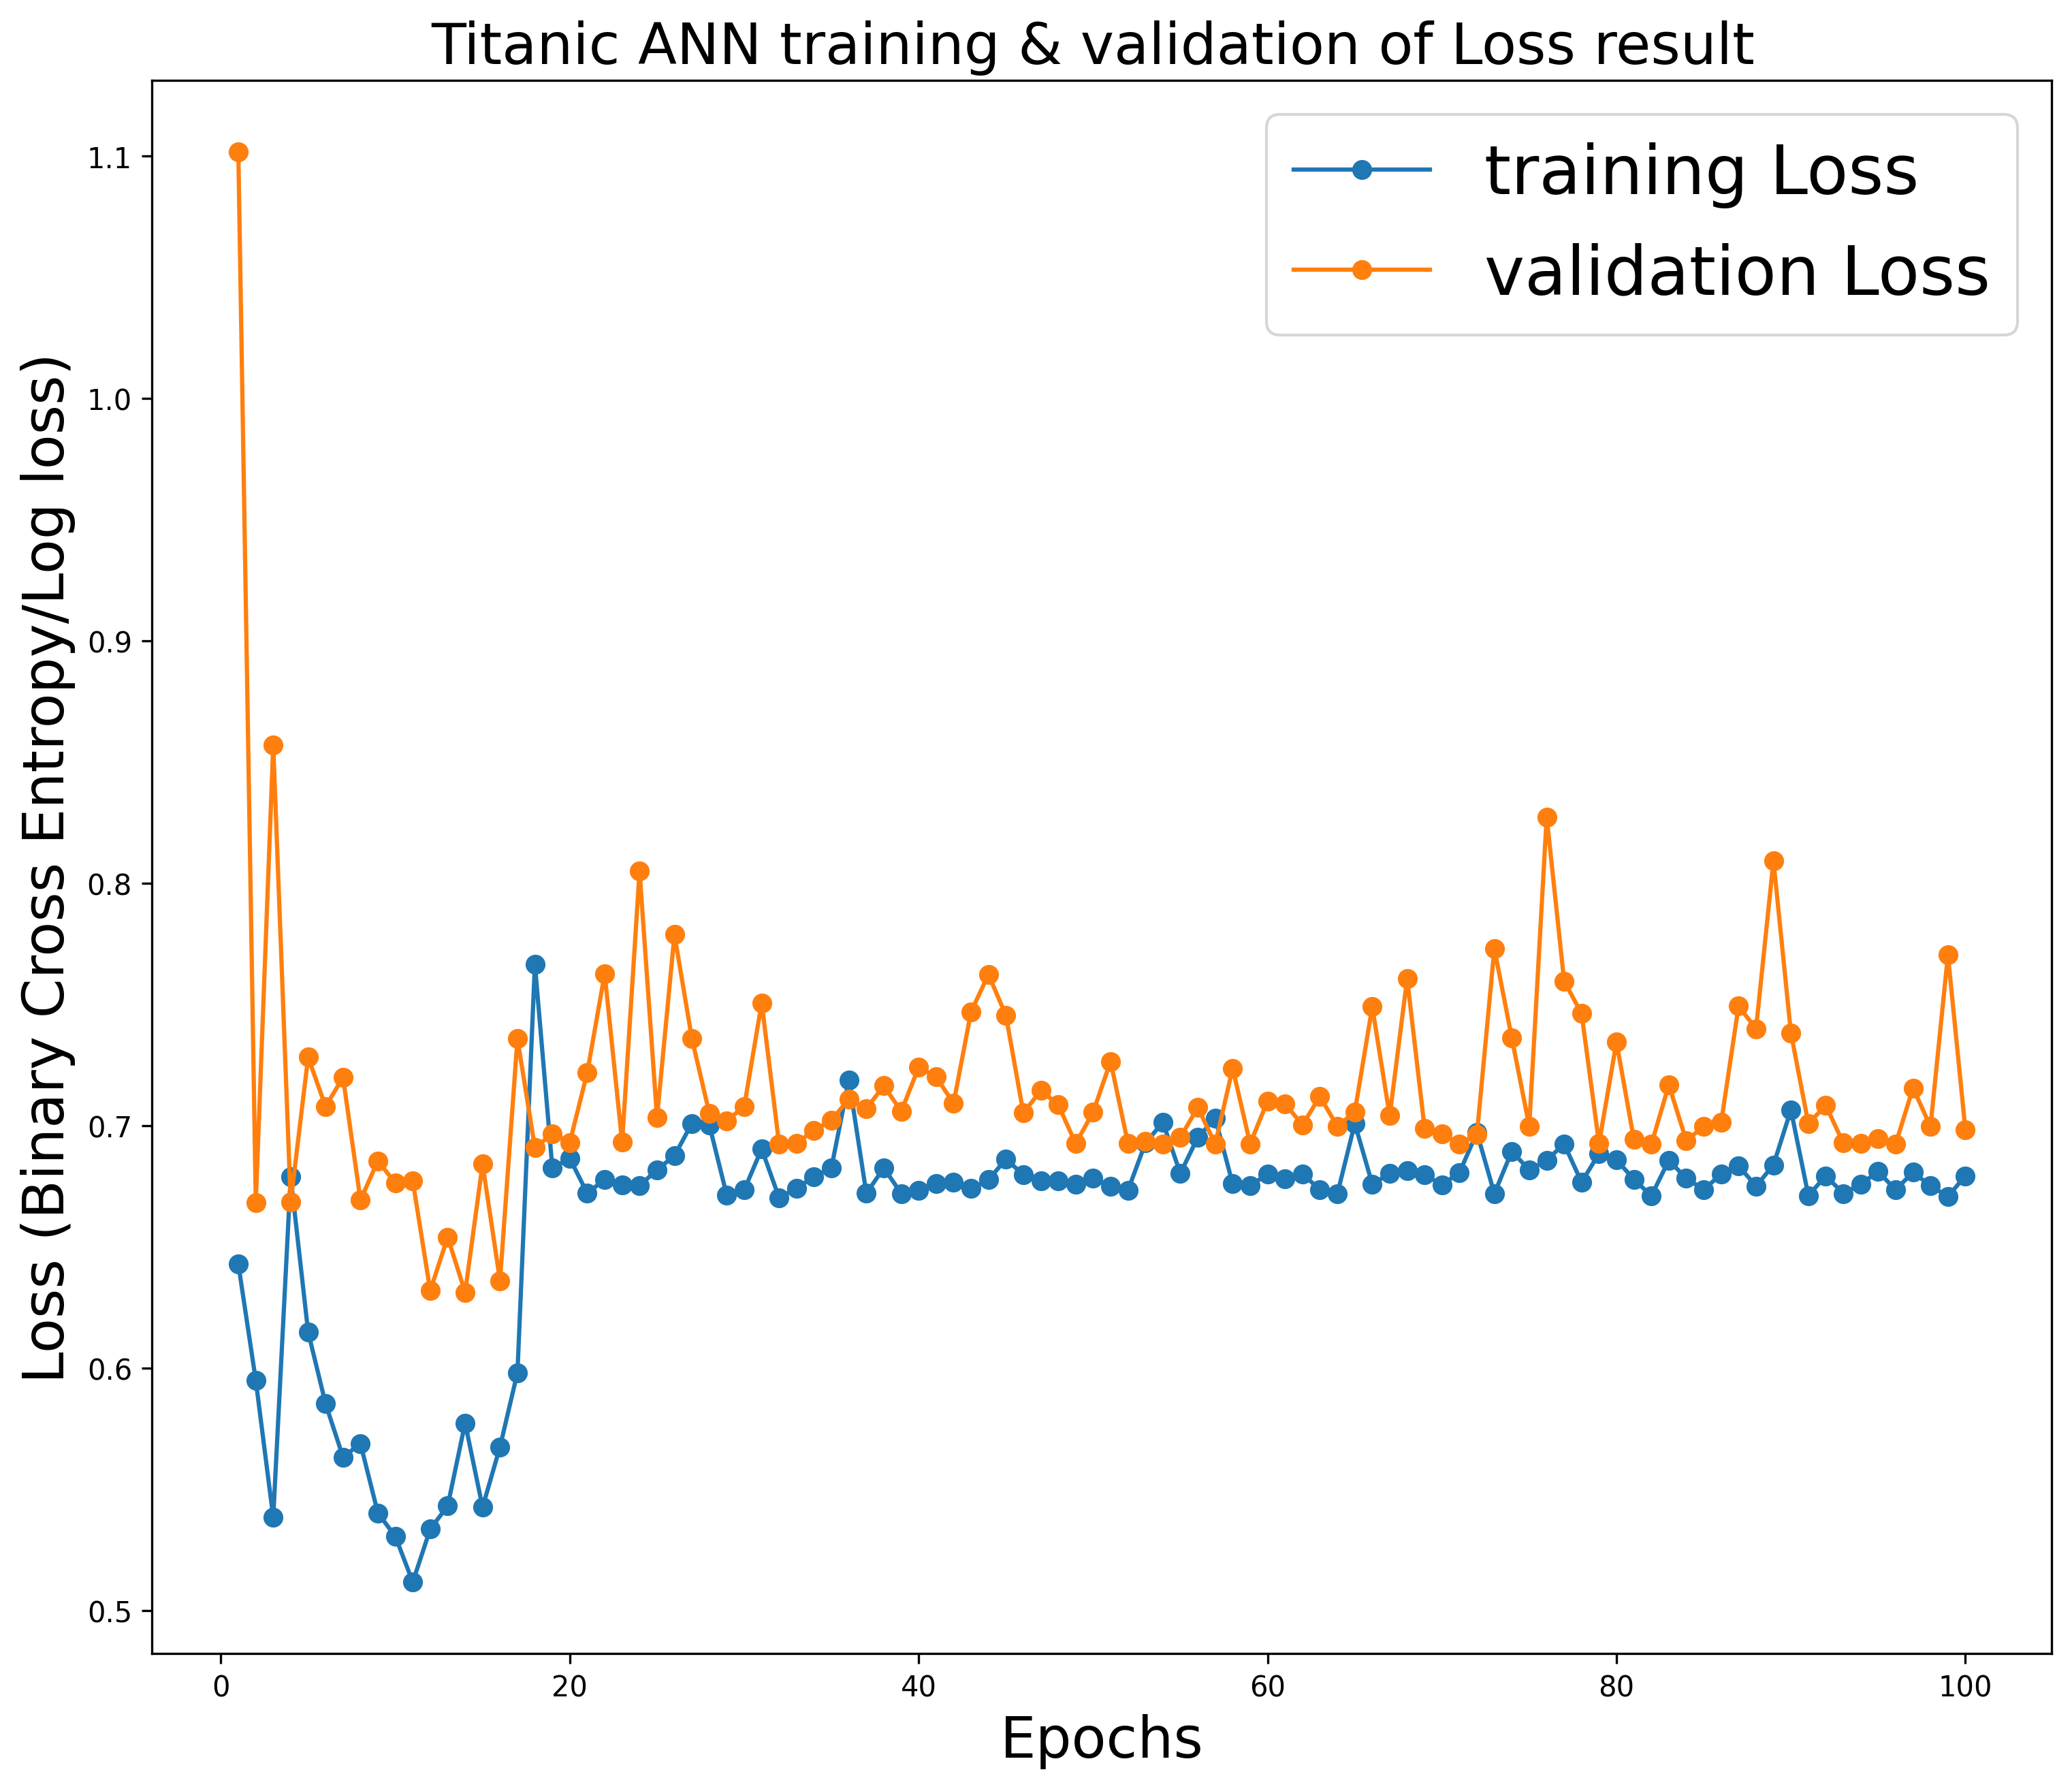

In [42]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Binary Cross Entropy/Log loss)',fontsize=20)
plt.title('Titanic ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

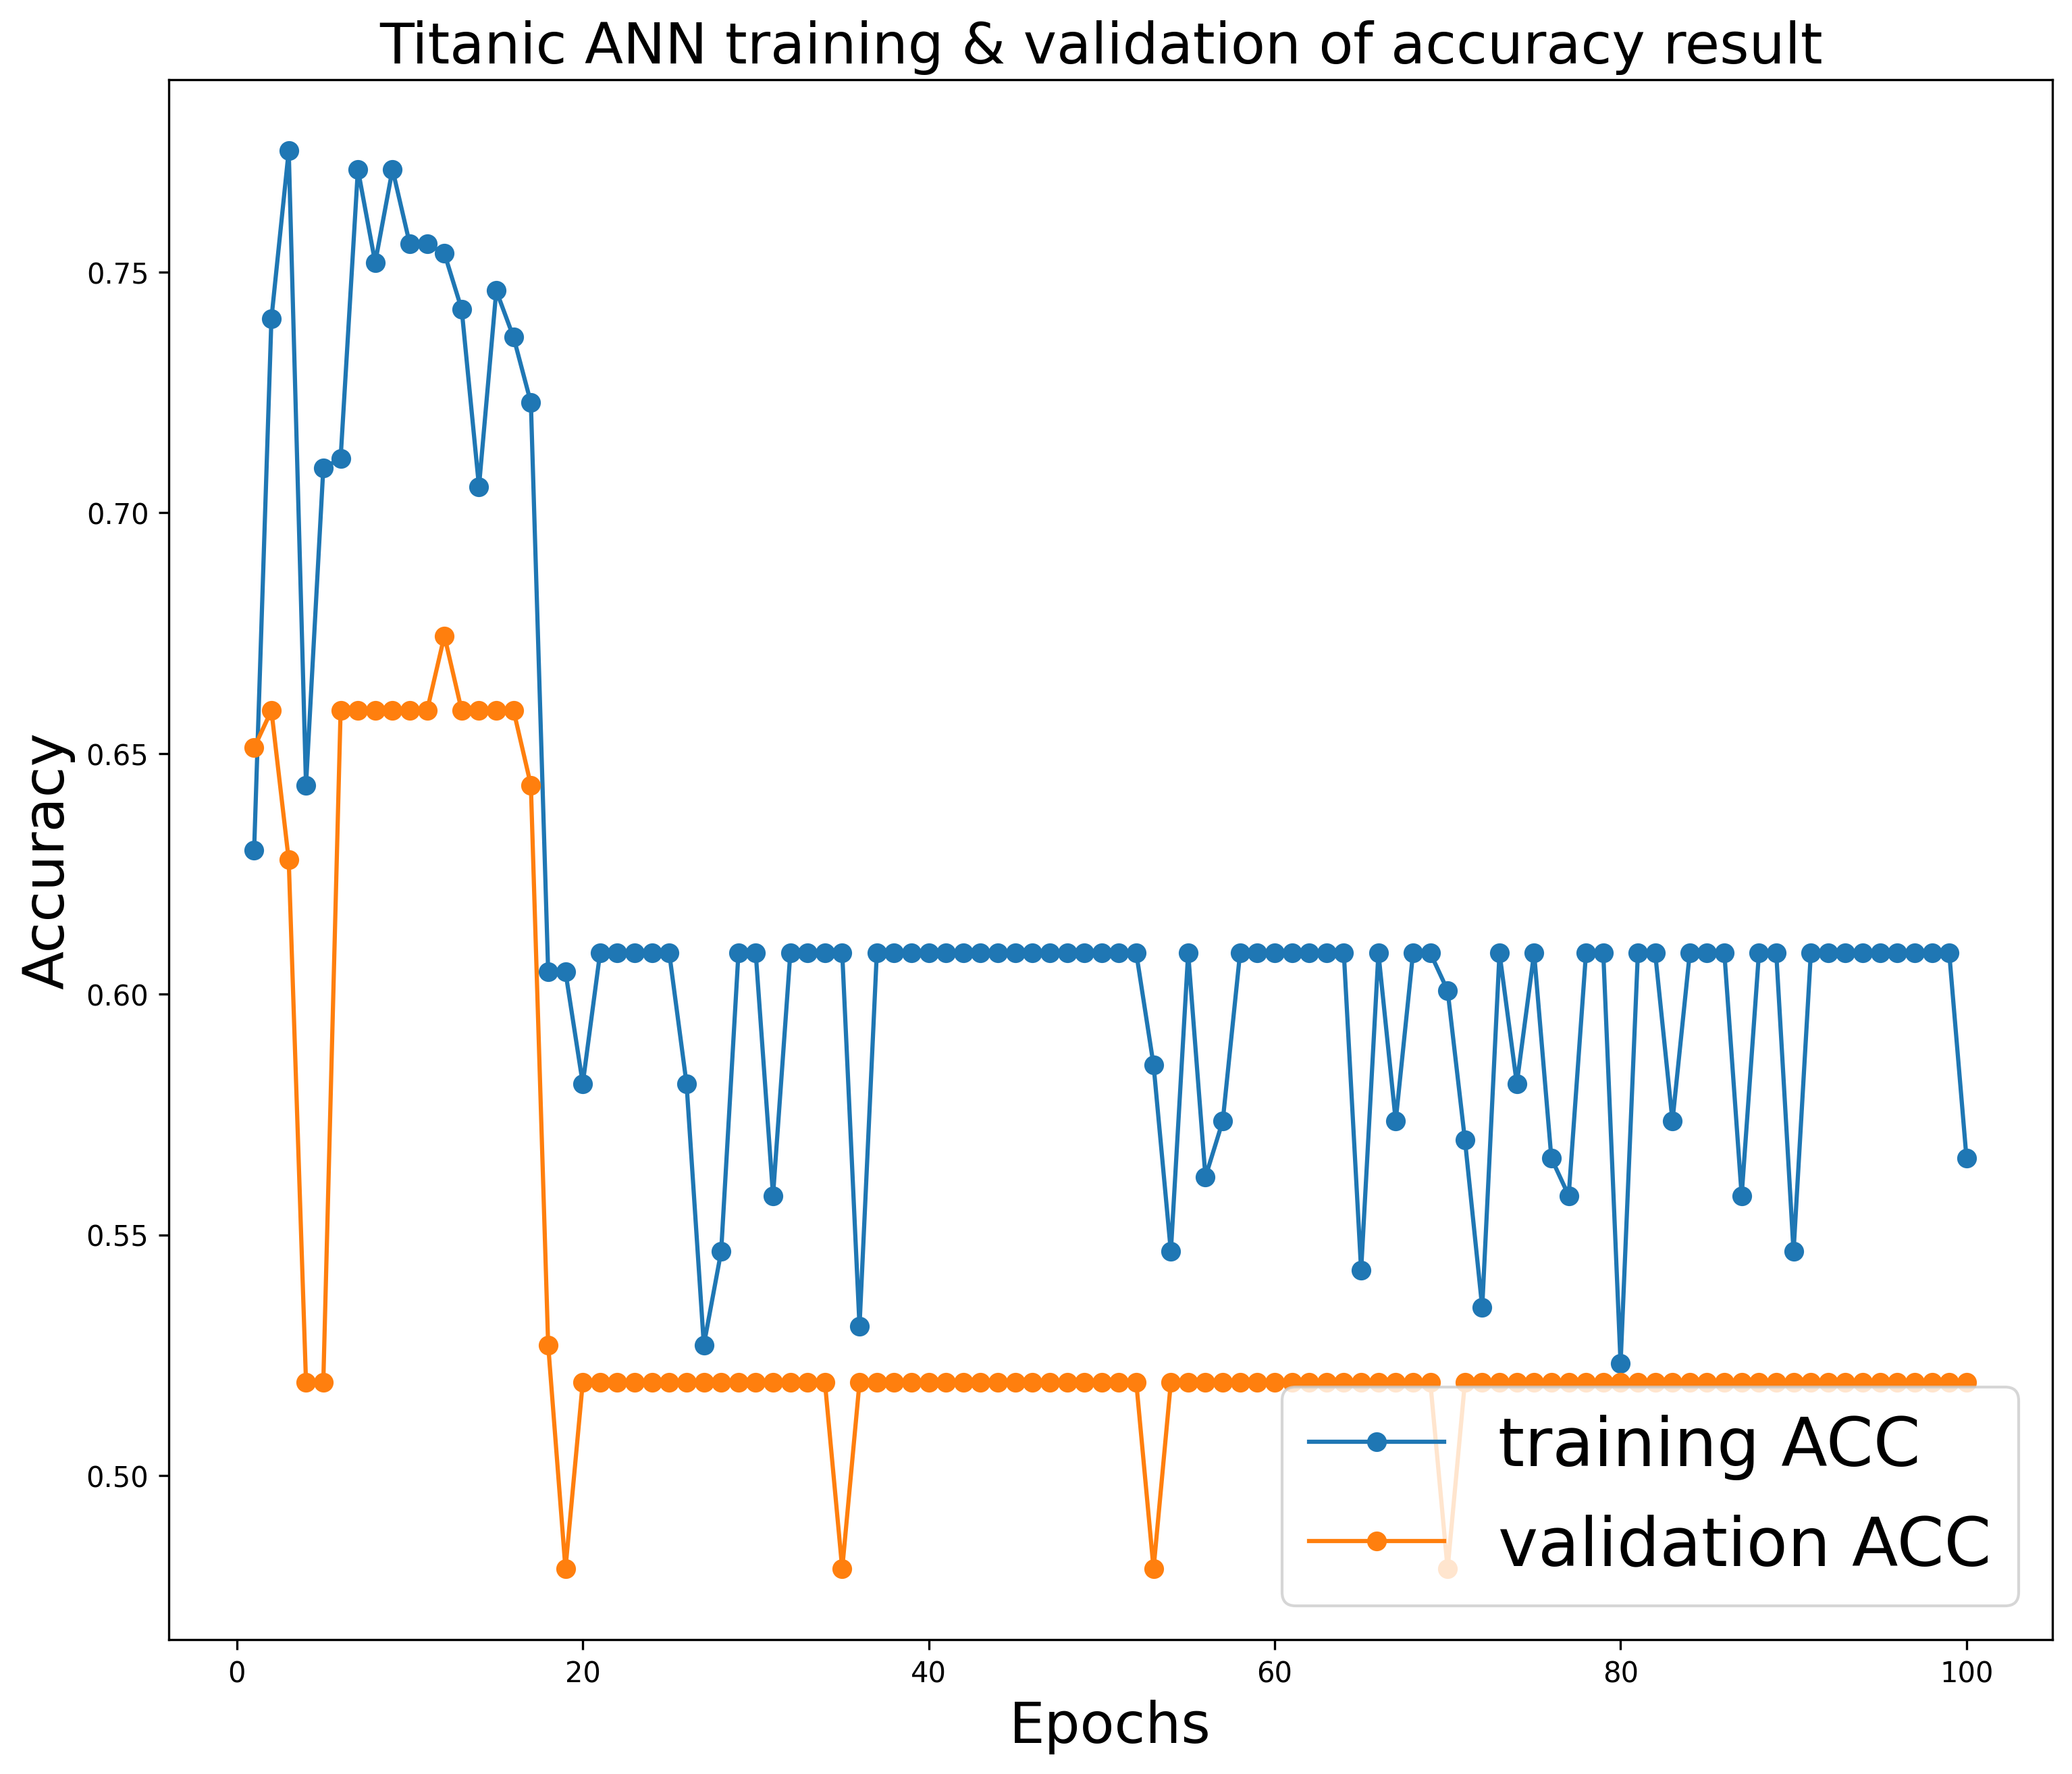

In [43]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [44]:
# 7.3 Save the trained model
#model.save('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
# Colab
model.save('titanic_ANN_trained_model.h5')
print('Model has been saved...')

Model has been saved...


In [45]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
# Colab
ANN_model=keras.models.load_model('/content/titanic_ANN_trained_model.h5')
print('Model successfully loaded...')

Model successfully loaded...


# 8. Testing

In [46]:
# 8.1 Make prediction 
prediction=ANN_model.predict_on_batch(x_test)
prediction

array([[0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.4255459 ],
       [0.425

Note: The prediction generate by ANN are values between 0 and 1, so a transformation is required before calculating the metrics and confusion matrix 

In [47]:
# 8.2 Transform the predictions to 0 and 1 
testing_prediction=(ANN_model.predict_on_batch(x_test) >= 0.5).astype('int')
testing_prediction

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [48]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 56.79
Testing f1s: 0.0
Testing pre: 0.0
Testing sen: 0.0
Testing spe: 100.0

Testing confusion matrix:
[[92  0]
 [70  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# Tip: Quick testing with the metrics set for the model by using evaluate function
ANN_model.evaluate(x_test,y_test,batch_size=64,verbose=1)

3/3 [==============================] - 0s 5ms/step - loss: 0.6840 - accuracy: 0.5679


[0.68398517370224, 0.5679012537002563]